In [32]:
import pandas as pd
import numpy as np

In [33]:
df=pd.read_csv('train.csv')

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [36]:
df.shape

(891, 12)

In [37]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
# Step 1: Convert columns to numeric types (force bad text to NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Step 2: Fill missing values with the column median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Step 3: (Optional extra safety)
# For 'SibSp' and 'Parch' (already integers, but fill just in case)
df['SibSp'].fillna(df['SibSp'].median(), inplace=True)
df['Parch'].fillna(df['Parch'].median(), inplace=True)

# Now df is fully clean for these features!


C:\Users\Dell\AppData\Local\Temp\ipykernel_8944\398410415.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8944\398410415.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Keep only numeric columns and clean them forcefully
df = df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].copy()

# Ensure all are numeric (already filled missing in 'Age' and 'Fare')
df = df.apply(pd.to_numeric, errors='coerce')

# Fill remaining NaNs with median (extra safety)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['SibSp'].fillna(df['SibSp'].median(), inplace=True)
df['Parch'].fillna(df['Parch'].median(), inplace=True)
df['Survived'].fillna(df['Survived'].median(), inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_8944\2714108471.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8944\2714108471.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Text(0.5, 1.02, 'Pairplot of Titanic Dataset (Fully Cleaned)')

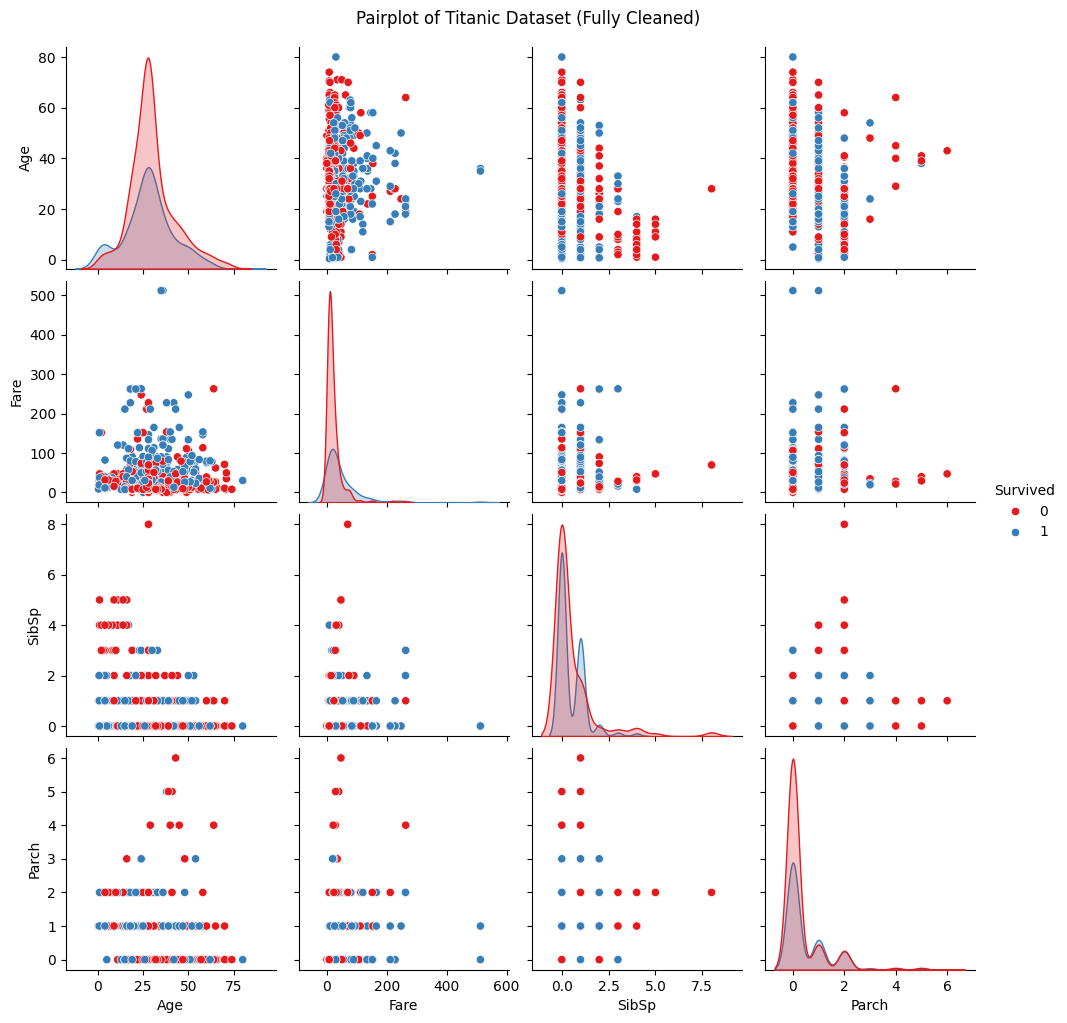

In [46]:
# Pairplot
pairplot_fig = sns.pairplot(df, vars=['Age', 'Fare', 'SibSp', 'Parch'], hue="Survived", palette="Set1")
pairplot_fig.fig.suptitle("Pairplot of Titanic Dataset (Fully Cleaned)", y=1.02)

EXPLAINATION


In [ ]:
"""
On the above pairplot we have used Age, Fare, SibSp, Parch, colored by Survival 
and Survivors (red) often have slightly higher fares
Age distribution is very wide for both survived and non-survived
SibSp and Parch are mostly low numbers between (0-2)
"""            

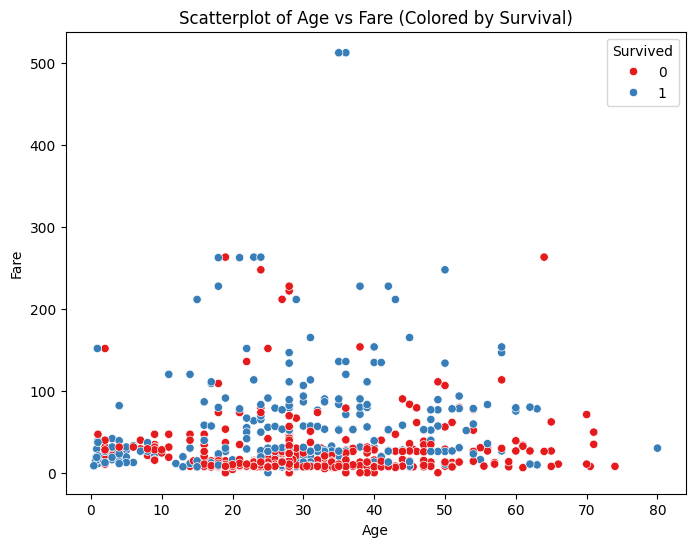

In [61]:
# Scatterplot
plt.figure(figsize=(8,6))
scatter_fig = sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, palette="Set1")
plt.title("Scatterplot of Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")

EXPLAINATION

In [ ]:

"""
On the above scatter Graph show  how Age and Fare relate to Survival
Passengers who paid higher fares had a higher chance to survive
Young and very old passengers are scattered everywhere
"""


Text(0.5, 1.0, 'Heatmap of Feature Correlations')

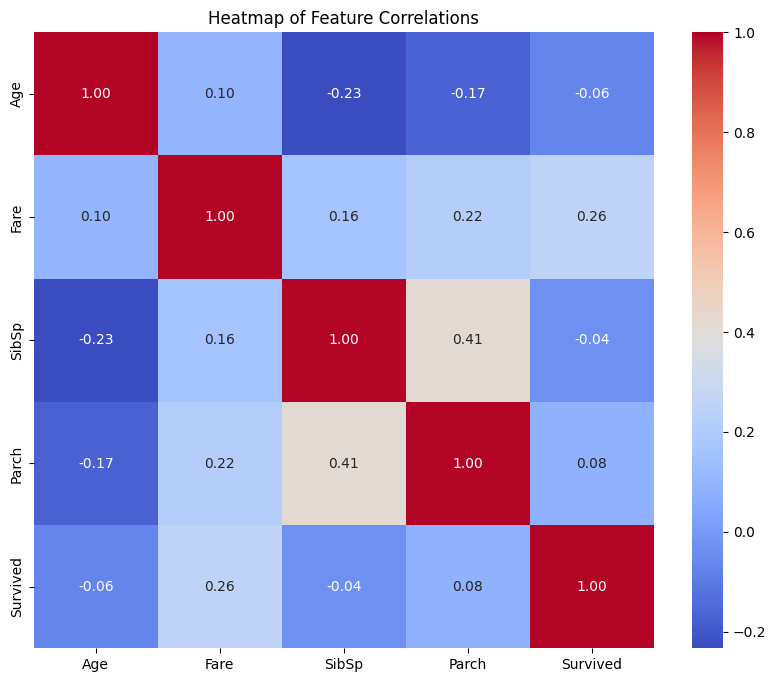

In [58]:
# Heatmap
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
heatmap_fig = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")

EXPLAINATION

In [ ]:
"""
On the above Heatmap show how strongly variables are correlated
Fare and Survival have a positive correlation (~0.26)
SibSp and Parch are positively related (people traveling with family)
Age has very little correlation to Survival
"""


C:\Users\Dell\AppData\Local\Temp\ipykernel_8944\2889174793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot_fig = sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")


Text(0, 0.5, 'Age')

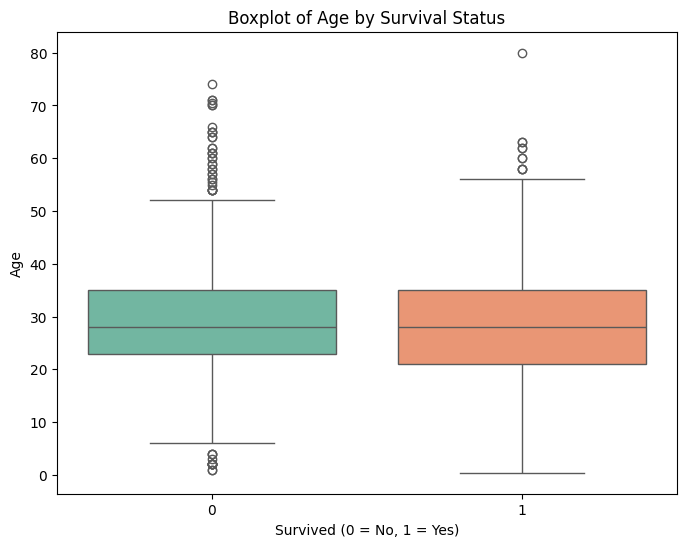

In [59]:
# Boxplot (Age by Survival)
plt.figure(figsize=(8,6))
boxplot_fig = sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")
plt.title("Boxplot of Age by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")

EXPLAINATION

In [ ]:
"""
On the above Boxplot Compares the age distribution of survived vs non-survived
Median age of survivors is a little lower than non-survivors
Some very old survivors are outliers
"""

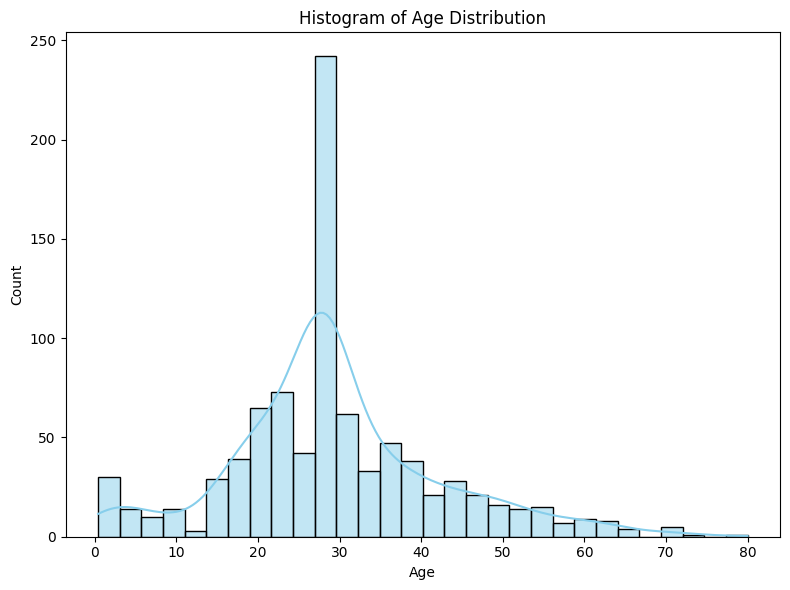

In [60]:
# Histogram (Age distribution)
plt.figure(figsize=(8,6))
histogram_fig = sns.histplot(df["Age"], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

EXPLAINATION

In [ ]:
"""
On the abpve Graph show Distribution of ages overall
Huge number of passengers are between 20–40 years old
Some younger and older passengers exist but fewer
"""
